## Let's try to use EventFilter regressor for ranking problems

training 1000000 trees, trying to obtain better quality

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import h5py
import pandas
from sklearn.metrics import mean_squared_error

In [3]:
def load_h5(name):
    print "reading from",name
    h5f = h5py.File(name,'r')
    labels = h5f['labels'][:]
    qids = h5f['qids'][:]
    features = h5f['features'][:]
    h5f.close()
    print "done"
    sorter = numpy.argsort(qids)
    return features[sorter], qids[sorter], labels[sorter]

In [4]:
Xtr,Qtr,Ytr = load_h5("../data/MSLR/mslr_train")
Xts,Qts,Yts = load_h5("../data/MSLR/mslr_test")

reading from ../data/MSLR/mslr_train
done
reading from ../data/MSLR/mslr_test
done


In [5]:
print len(Xtr), len(Xts)

723412 241521


In [6]:
from rep_ef.estimators import MatrixNetSkyGridRegressor

In [ ]:
ef = MatrixNetSkyGridRegressor(connection='skygrid', user_name='axelr', regularization=0.001, 
                               features_sample_rate_per_iteration=0.2,
                               iterations=100000, training_fraction=0.2)

In [ ]:
%%time
ef.fit(Xtr, Ytr)

In [ ]:
import cPickle
with open('../data/MSLR10k_skygrid.mx', 'w') as f:
    cPickle.dump(ef.formula_mx, f)

In [ ]:
import cPickle
with open('../data/MSLR10k_skygrid.mx', 'r') as f:
    formula_mx = cPickle.load(f)

In [ ]:
from _matrixnetapplier import MatrixnetClassifier
from StringIO import StringIO

In [18]:
mn = MatrixnetClassifier(StringIO(formula_mx))

In [19]:
mean_squared_error(Yts, mn.apply(Xts))

0.55808560848598077

In [24]:
from itertools import islice
def plot_mse_curves(clf, step=10):
    mses_ts = []
    for p in islice(clf.staged_predict(Xts), None, None, step):
        mses_ts.append(mean_squared_error(Yts, p))
    mses_tr = []
    for p in islice(clf.staged_predict(Xtr), None, None, step):
        mses_tr.append(mean_squared_error(Ytr, p))
    plot(mses_ts)
    plot(mses_tr)
    return mses_tr, mses_ts

((0.5, 0.6), None)

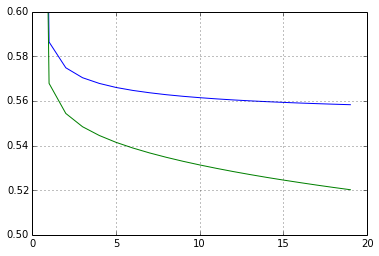

In [23]:
mses_ef = plot_mse_curves(ef, step=500)
ylim(0.5, 0.6), grid()